## Pima Indians Diabetes Database

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('./dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


checking for the null values

* dataframe.isna()
    - NA, None, numpy.nan -> true
    - the rest -> False

In [3]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Replacing the value 0 with Nan

In [5]:
col = [   'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age' ]
for i in col:
    df[i].replace(0, np.nan,inplace=True)

In [6]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

fuction is created to calculate median

In [7]:
def det_median(col_name):
    select_not_null=df[df[col_name].notnull()]
    result=select_not_null[[col_name,'Outcome']].groupby(['Outcome'])[[col_name]].median().reset_index()
    return result

In [8]:
det_median('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [9]:
det_median('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [10]:
det_median('Pregnancies')

,Outcome,Pregnancies
0,0,2
1,1,4


In [11]:
det_median('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [12]:
det_median('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [13]:
det_median('DiabetesPedigreeFunction')

,Outcome,DiabetesPedigreeFunction
0,0,0.336
1,1,0.449


In [14]:
det_median('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


Here null values is replaced by median . here we created seperate median  
i.e for outcome 0 and 1

* df.loc["column_name"] -> Output corresponding column

    ex1) if outcome = 0 and BMI = null value -> Replace the null value of BMI with 30.1  
    ex2) if outcome = 1 and BMI = null value -> Replace the null value of BMI with 34.3

In [15]:
det_median('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [16]:
df.loc[(df['Outcome']==0) & (df['BMI'].isnull()),'BMI']

49    NaN
60    NaN
81    NaN
145   NaN
371   NaN
426   NaN
494   NaN
522   NaN
684   NaN
Name: BMI, dtype: float64

In [17]:
df.loc[(df['Outcome']==1) & (df['BMI'].isnull()),'BMI']

9     NaN
706   NaN
Name: BMI, dtype: float64

null values is replaced by median:

In [18]:
df.loc[(df['Outcome']==0) & (df['BMI'].isnull()),'BMI'] =30.1
df.loc[(df['Outcome']==1) & (df['BMI'].isnull()),'BMI'] =34.3

df.loc[(df['Outcome']==0) & (df['Glucose'].isnull()),'Glucose'] =107.0
df.loc[(df['Outcome']==1) & (df['Glucose'].isnull()),'Glucose'] =140.0

df.loc[(df['Outcome']==0) & (df['BloodPressure'].isnull()),'BloodPressure'] =70.0
df.loc[(df['Outcome']==1) & (df['BloodPressure'].isnull()),'BloodPressure'] =74.5

# df.loc[(df['Outcome']==0) & (df['Pregnancies'].isnull()),'Pregnancies'] =3 
# df.loc[(df['Outcome']==1) & (df['Pregnancies'].isnull()),'Pregnancies'] =5

df.loc[(df['Outcome']==0) & (df['Insulin'].isnull()),'Insulin'] =102.5
df.loc[(df['Outcome']==1) & (df['Insulin'].isnull()),'Insulin'] =169.5

df.loc[(df['Outcome']==0) & (df['SkinThickness'].isnull()),'SkinThickness'] =27.0
df.loc[(df['Outcome']==1) & (df['SkinThickness'].isnull()),'SkinThickness'] =32.0

In [19]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Checking the outliers and removing it with the median**

<AxesSubplot:xlabel='Age'>

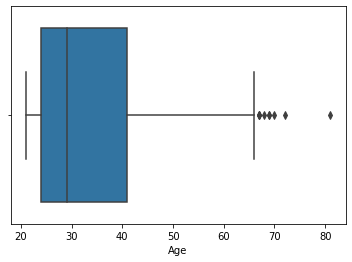

In [20]:
#sns.PairGrid(data = df.Age)

sns.boxplot(df.Age)

In [21]:
det_median('Age')

,Outcome,Age
0,0,27
1,1,36


- if outcome = 0 and Age over 63 -> Replace the value of Age with 27
- if outcome = 1 and Age over 63 -> Replace the value of Age with 36

In [22]:
det_median('Age')

,Outcome,Age
0,0,27
1,1,36


In [23]:
df.loc[(df['Outcome']==0) & (df['Age']>63),'Age']

123    69
148    65
294    65
362    65
453    72
459    81
489    67
495    66
509    64
537    67
552    66
674    68
684    69
Name: Age, dtype: int64

In [24]:
df.loc[(df['Outcome']==1) & (df['Age']>63),'Age']

221    66
363    67
666    70
759    66
Name: Age, dtype: int64

Age over 63 is replaced by median:

In [25]:
df.loc[(df['Outcome']==0) & (df['Age']>63),'Age'] =27
df.loc[(df['Outcome']==1) & (df['Age']>63),'Age'] =36

Draw box plot for Checking the outliers.

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

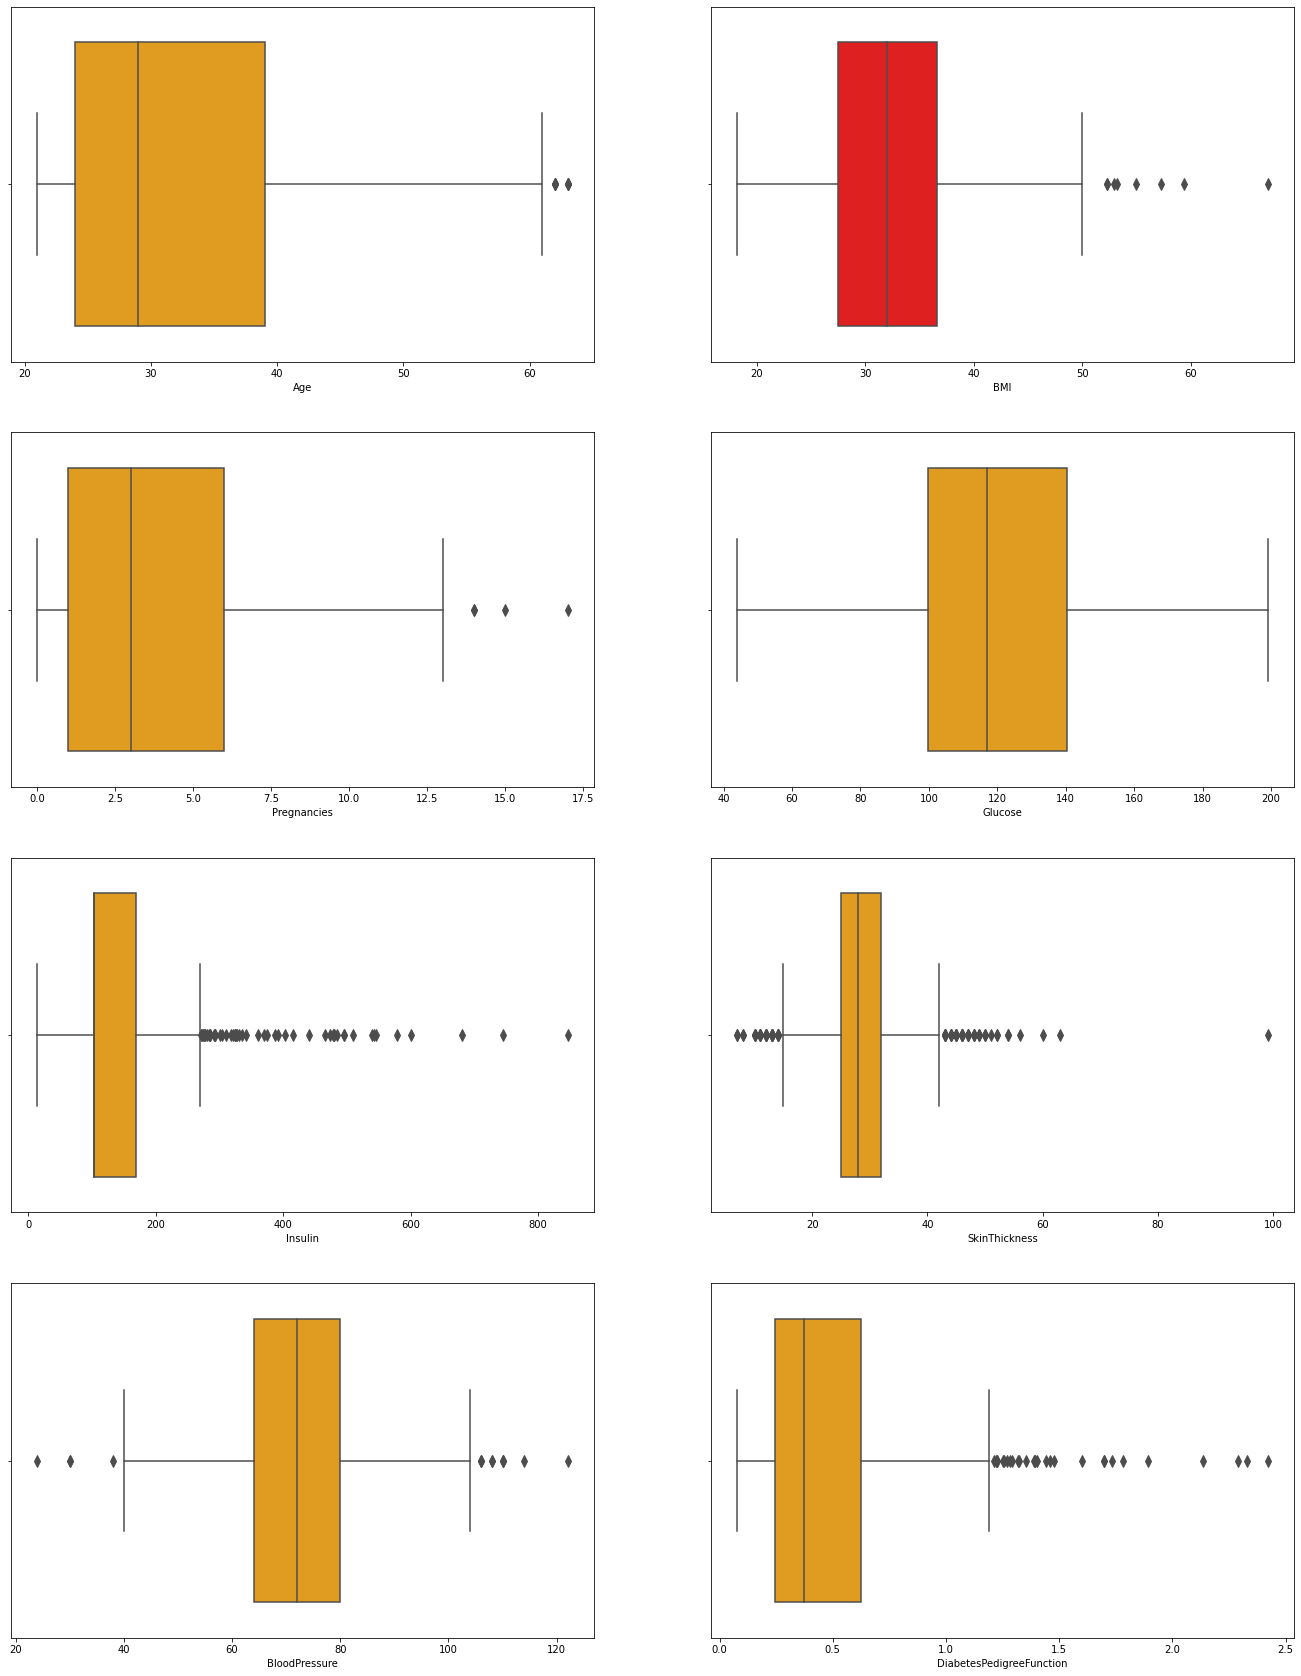

In [26]:
fig,axes=plt.subplots(4,2,figsize=(23,30))
sns.boxplot(ax=axes[0,0],x='Age' ,data=df,color='orange',fliersize=8)
sns.boxplot(ax=axes[0,1],x='BMI',data=df,color='red',fliersize=8)
sns.boxplot(ax=axes[1,0],x='Pregnancies',data=df,color='orange',fliersize=8)
sns.boxplot(ax=axes[1,1],x='Glucose',data=df,color='orange',fliersize=8)
sns.boxplot(ax=axes[2,0],x='Insulin',data=df,color='orange',fliersize=8)
sns.boxplot(ax=axes[2,1],x='SkinThickness',data=df,color='orange',fliersize=8)
sns.boxplot(ax=axes[3,0],x='BloodPressure',data=df,color='orange',fliersize=8)
sns.boxplot(ax=axes[3,1],x='DiabetesPedigreeFunction',data=df,color='orange',fliersize=8)

Look at the graph above.  
If you find outliers value, you should replace outliers value to median.

In [27]:
df.loc[(df['Outcome']==0) & (df['BMI']>52),'BMI'] =30.1
df.loc[(df['Outcome']==1) & (df['BMI']>52),'BMI'] =34.3
 
df.loc[(df['Outcome']==0) & (df['BloodPressure']>105),'BloodPressure'] =70.0
df.loc[(df['Outcome']==1) & (df['BloodPressure']>105),'BloodPressure'] =74.5

df.loc[(df['Outcome']==0) & (df['Pregnancies']>12),'Pregnancies'] =2 
df.loc[(df['Outcome']==1) & (df['Pregnancies']>12),'Pregnancies'] =4

df.loc[(df['Outcome']==0) & (df['Insulin']>250),'Insulin'] =102.5
df.loc[(df['Outcome']==1) & (df['Insulin']>250),'Insulin'] =169.5

df.loc[(df['Outcome']==0) & (df['SkinThickness']>40),'SkinThickness'] =27.0
df.loc[(df['Outcome']==1) & (df['SkinThickness']>40),'SkinThickness'] =32.0

df.loc[(df['Outcome']==0) & (df['DiabetesPedigreeFunction']>1),'DiabetesPedigreeFunction'] =0.336
df.loc[(df['Outcome']==1) & (df['DiabetesPedigreeFunction']>1),'DiabetesPedigreeFunction'] =0.449

In [28]:
df.loc[(df['Outcome']==0) & (df['SkinThickness']<20),'SkinThickness'] =27.0
df.loc[(df['Outcome']==1) & (df['SkinThickness']<20),'SkinThickness'] =32.0

df.loc[(df['Outcome']==0) & (df['BloodPressure']<40),'BloodPressure'] =70.0
df.loc[(df['Outcome']==1) & (df['BloodPressure']<40),'BloodPressure'] =74.5

After outliers removed, draw box plot for Checking the outliers.

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

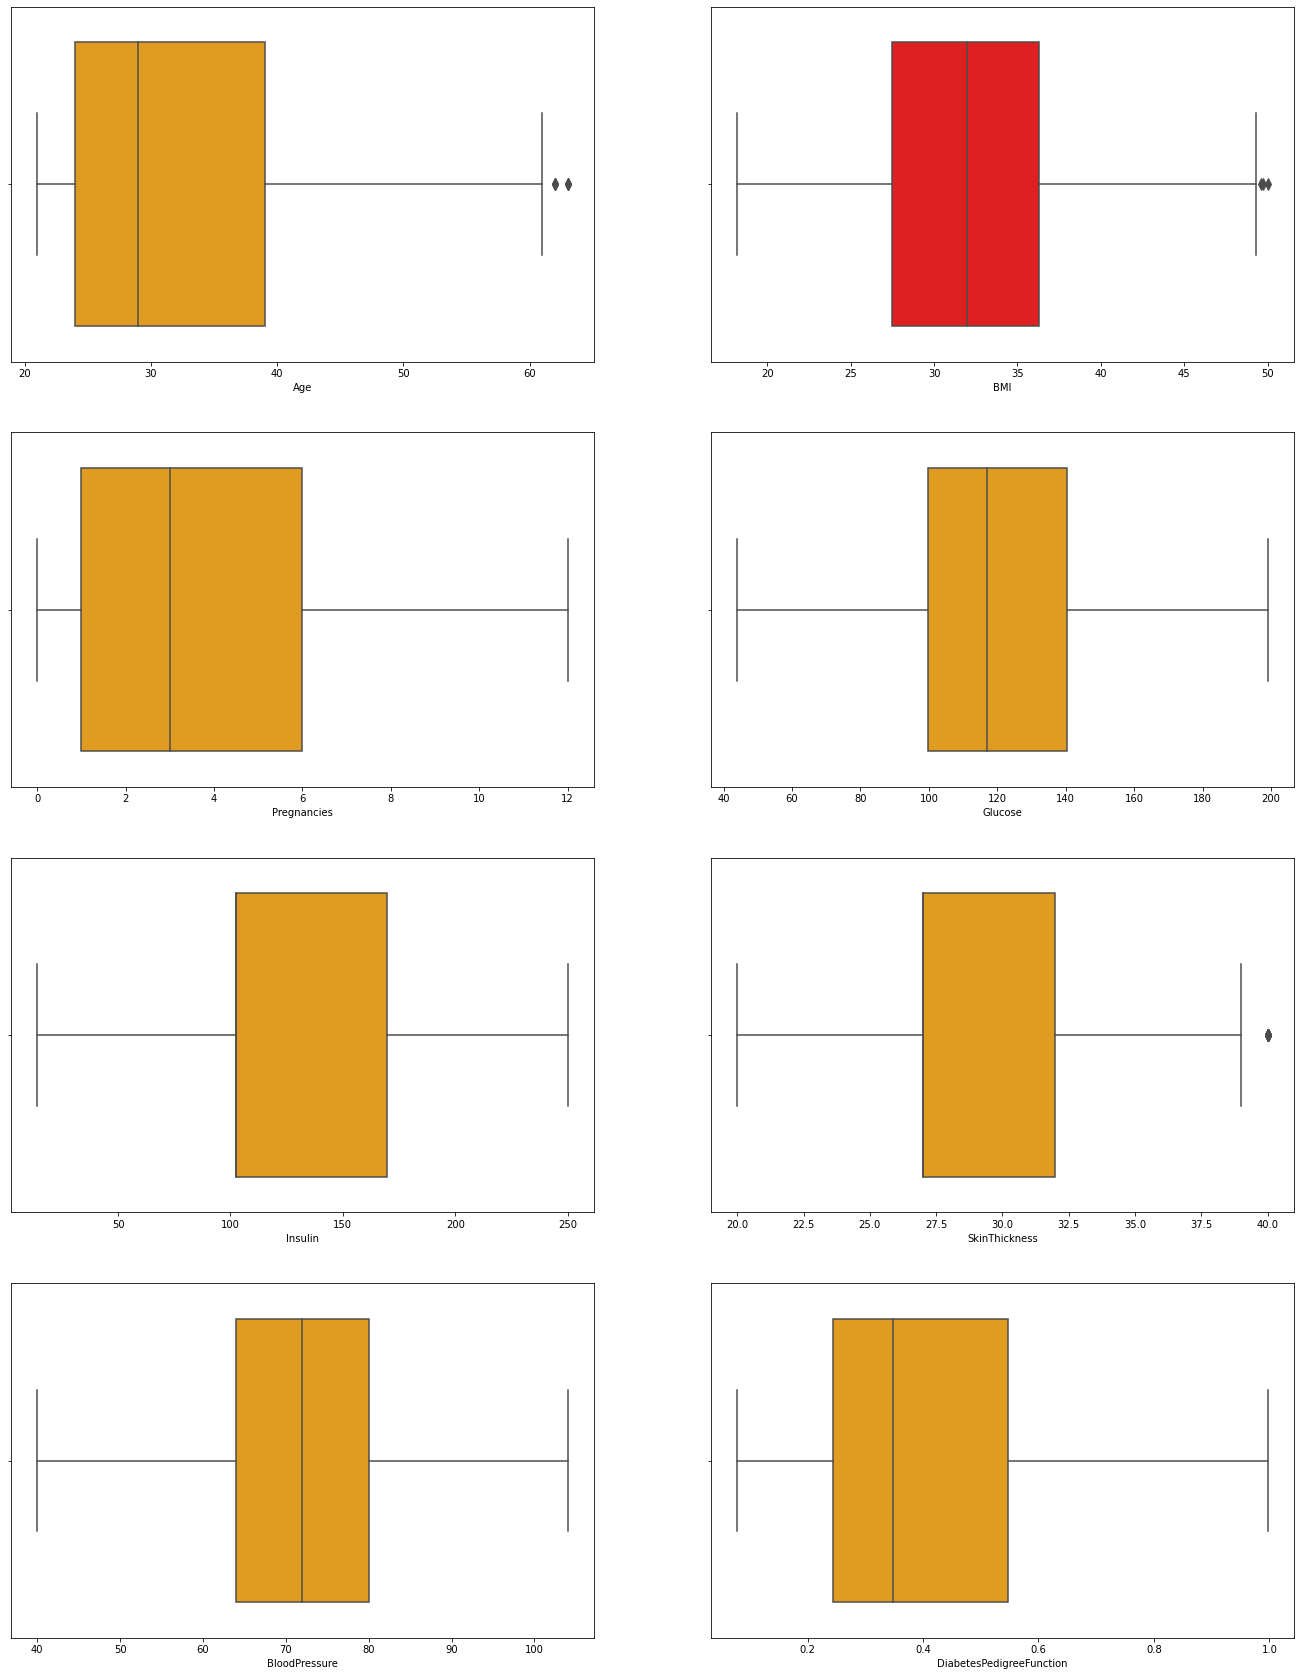

In [29]:
fig,axes=plt.subplots(4,2,figsize=(23,30))
sns.boxplot(ax=axes[0,0],x='Age' ,data=df,color='orange',fliersize=8)
sns.boxplot(ax=axes[0,1],x='BMI',data=df,color='red',fliersize=8)
sns.boxplot(ax=axes[1,0],x='Pregnancies',data=df,color='orange',fliersize=8)
sns.boxplot(ax=axes[1,1],x='Glucose',data=df,color='orange',fliersize=8)
sns.boxplot(ax=axes[2,0],x='Insulin',data=df,color='orange',fliersize=8)
sns.boxplot(ax=axes[2,1],x='SkinThickness',data=df,color='orange',fliersize=8)
sns.boxplot(ax=axes[3,0],x='BloodPressure',data=df,color='orange',fliersize=8)
sns.boxplot(ax=axes[3,1],x='DiabetesPedigreeFunction',data=df,color='orange',fliersize=8)

In [30]:
# Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],

splitting the dataset for testing and tranning

**model 1 : LogisticRegression**   
**model 2 : RandomForestRegressor**  
**model 3 : SVC**  
**model 4 : xgb**

In [31]:
X=df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train) # model training
y_predict_logreg = logreg.predict(X_test)
print(classification_report(y_test,y_predict_logreg))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       107
           1       0.80      0.87      0.84        47

    accuracy                           0.90       154
   macro avg       0.87      0.89      0.88       154
weighted avg       0.90      0.90      0.90       154



In [34]:
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor()
rforest.fit(X_train,y_train) # model training
rforest.score(X_test,y_test)
#y_pred_ran = rforest.predict(X_test)

0.7480910320143169

In [35]:
#y_pred_ran 

=> RandomForestRegressor : Predict regression target for X.

In [36]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,y_train)
classifier.score(X_test,y_test)
y_pred_svm = classifier.predict(X_test)
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       107
           1       0.81      0.91      0.86        47

    accuracy                           0.91       154
   macro avg       0.89      0.91      0.90       154
weighted avg       0.91      0.91      0.91       154



In [37]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.02)
model.fit(X_train, y_train)
model.score(X_test,y_test)
y_predict_xg=model.predict(X_test)
print(classification_report(y_test,y_predict_xg))

[16:12:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       107
           1       0.84      0.91      0.88        47

    accuracy                           0.92       154
   macro avg       0.90      0.92      0.91       154
weighted avg       0.93      0.92      0.92       154



We evaluate the performance of each model using the Stratified KFold method.  
(Apply cross-validation to allow the model to generalize for all samples.)

Reference. https://woolulu.tistory.com/70

In [38]:
from sklearn import model_selection,metrics 

In [39]:
cv = model_selection.StratifiedKFold(n_splits=10)

def acc_score(model):
    score=model_selection.cross_val_score(model,X_train,y_train,cv=cv,scoring ='accuracy', n_jobs = -1)
    return(score.mean())

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
import xgboost as xgb

In [41]:
scores = []
models = {
    'logistic_regression': LogisticRegressionCV,
    'decision_tree': DecisionTreeClassifier,
    'random_forest': RandomForestClassifier,
    'gbm_classifier': GradientBoostingClassifier,
    'ext_classifier':ExtraTreesClassifier,
    'xgb_classifier':xgb.XGBClassifier
}

In [42]:
for model_names,model in models.items():
    model_pipeline = make_pipeline(StandardScaler(),model())
    print(f"{model_names}  :{acc_score(model_pipeline)}")

logistic_regression  :0.8548387096774194
decision_tree  :0.8565838180856689
random_forest  :0.9071126388154415
gbm_classifier  :0.9202009518773135
ext_classifier  :0.898995240613432
xgb_classifier  :0.9137228979375991


In [43]:
base_model=GradientBoostingClassifier()

In [44]:
base_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [45]:
y_pred=base_model.predict(X_test)

In [46]:
print(f"This is testing score : {metrics.accuracy_score(y_test,y_pred)}")
print(f"This is training score : {metrics.accuracy_score(y_train,base_model.predict(X_train))}")

This is testing score : 0.948051948051948
This is training score : 0.996742671009772


### lets tune the model

We use GridSearchCV to find the optimal parameters.

In [47]:
parameters = {
   # "loss":["deviance"],
    "learning_rate": [0.01, 0.025,  0.075 ],
    "min_samples_split": np.linspace(0.1, 0.5,6),
    "min_samples_leaf": np.linspace(0.1, 0.5, 6),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
  #  "subsample":[0.5, 0.618, 0.8 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

clf = model_selection.GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, n_jobs=-1,verbose=1)

clf.fit(X_train, y_train)
#print(clf.score(trainX, trainY))
print(clf.best_params_)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
{'criterion': 'friedman_mse', 'learning_rate': 0.075, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 10}


In [48]:
clf.best_score_

0.8860055977608956

In [49]:
y_pre=clf.predict(X_test)

In [50]:
metrics.accuracy_score(y_test,y_pre)

0.9285714285714286

In [51]:
print(f"This is testing score : {metrics.accuracy_score(y_test,y_pre)}")
print(f"This is training score : {metrics.accuracy_score(y_train,clf.predict(X_train))}")

This is testing score : 0.9285714285714286
This is training score : 0.9087947882736156


* References

https://www.kaggle.com/jeetu0980/pima-dataset-93-accuracy